# F 분포

student-t 분포와 카이 제곱 분포는 가우시안 정규 분포를 따르는 하나의 확률 변수 $X$ 의 $n$개의 샘플로부터 생성할 수 있었다.

이와 비슷하게 F 분포도 카이 제곱 분포를 따르는 독립적인 두 개의 확률 변수 $\chi^2_1(n_1)$와 $\chi^2_2(n_2)$의 확률 변수 샘플로부터 생성할 수 있다. 두 카이 제곱 분포의 샘플을 각각 $x_1$, $x_2$이라고 할 때 이를 각각 $n_1$, $n_2$로 나누어 그 비율을 구하면 $F(n_1, n_2)$ 분포가 된다. $n_1$, $n_2$는 F 분포의 자유도 인수이다.

$$ \dfrac{x_1 / n_1}{x_2/ n_2} \sim F(n_1, n_2) $$

F 분포의 확률 밀도 함수는 다음과 같이 정의된다.

$$ 
f(x; n_1,n_2) = \dfrac{\sqrt{\dfrac{(n_1\,x)^{n_1}\,\,n_2^{n_2}} {(n_1\,x+n_2)^{n_1+n_2}}}} {x\,\text{B}\!\left(\frac{n_1}{2},\frac{n_2}{2}\right)} 
$$

SciPy stats 서브패키지의 `f` 클래스는 F 분포를 지원한다.

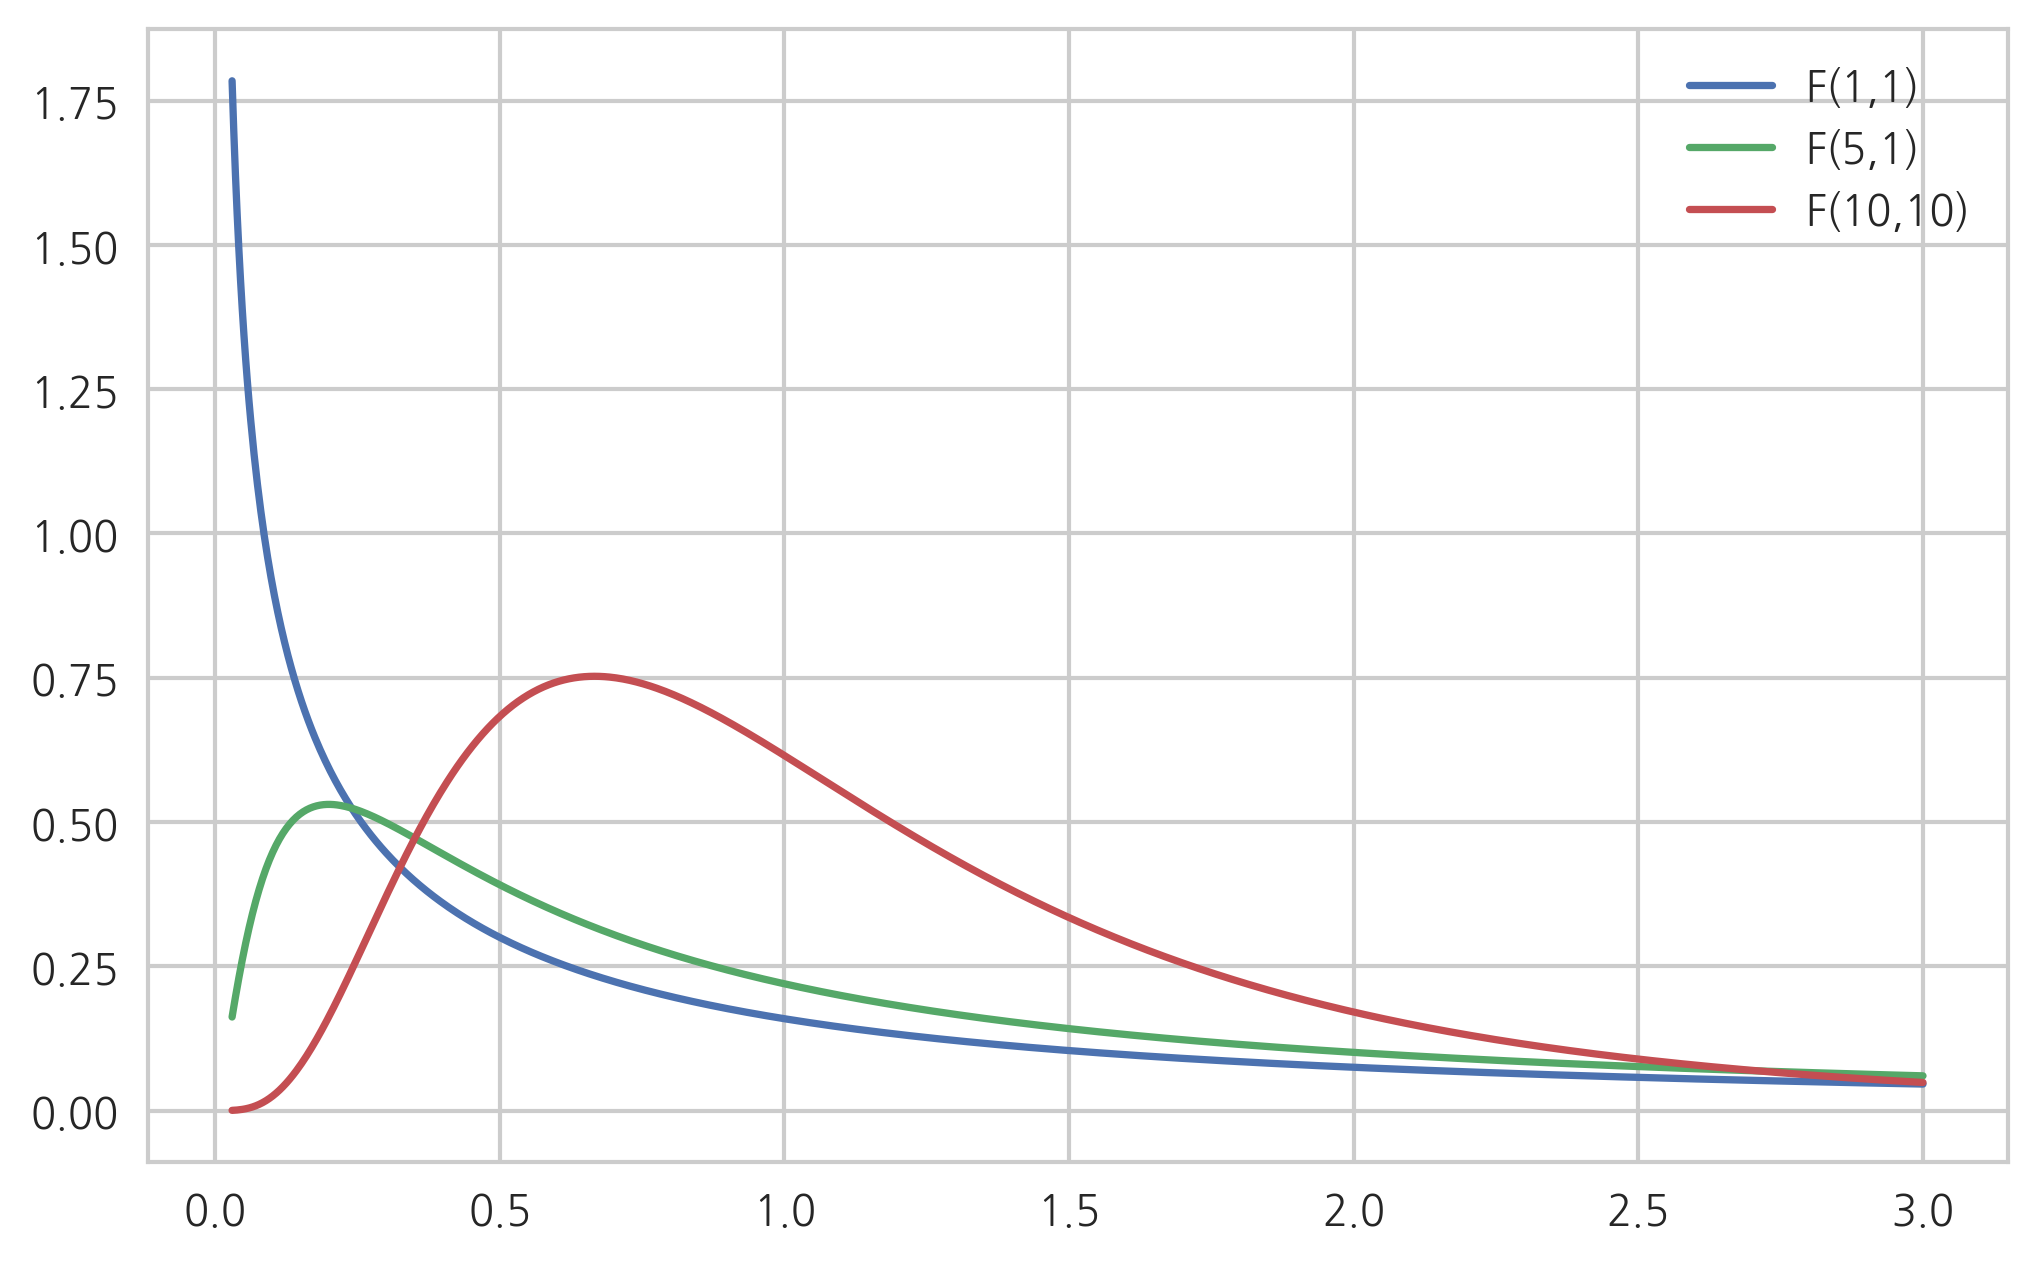

In [1]:
xx = np.linspace(0.03, 3, 1000)
plt.plot(xx, sp.stats.f(1, 1).pdf(xx), label="F(1,1)")
plt.plot(xx, sp.stats.f(5, 1).pdf(xx), label="F(5,1)")
plt.plot(xx, sp.stats.f(10, 10).pdf(xx), label="F(10,10)")
plt.legend()
plt.show()

F 분포에서 특이한 점은 N1과 N2의 값이 같을 경우 1 근처의 값이 가장 많이 발생할 것이라는 직관과 달리 1이 아닌 어떤 수가 더 흔하게 발생한다는 점이다. 시뮬레이션을 통해 실제로 제곱합의 비율의 분포를 살펴보면 다음과 같다.

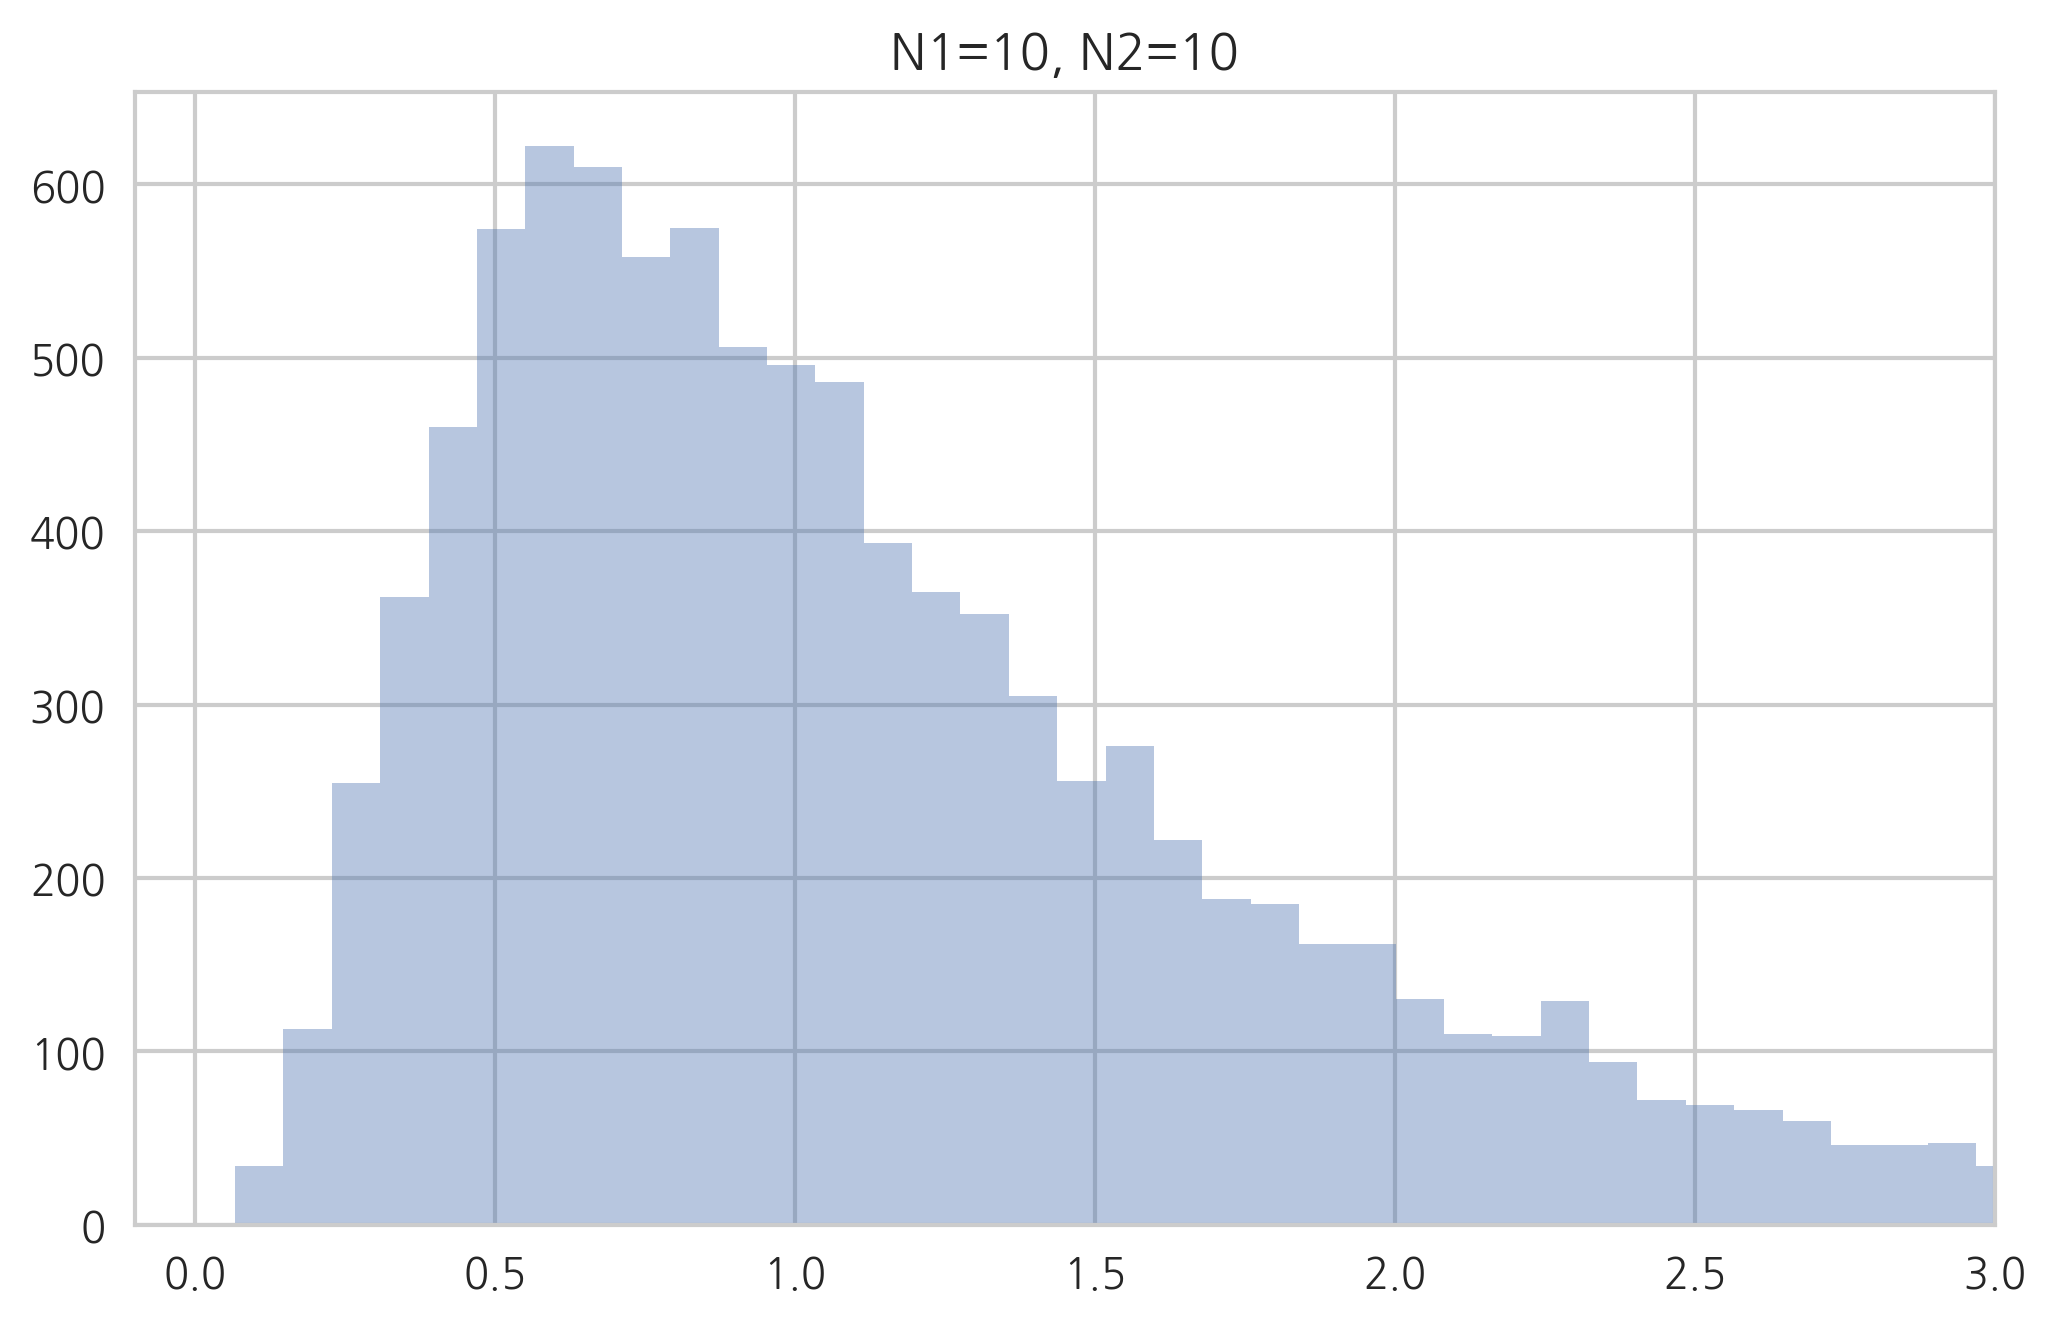

In [15]:
np.random.seed(0)

rv = sp.stats.norm()
M = 10000

N1 = 10
x1 = rv.rvs((N1, M))
t1 = (x1 ** 2).sum(axis=0)

N2 = 10
x2 = rv.rvs((N2, M))
t2 = (x2 ** 2).sum(axis=0)

t = t2 / t1
sns.distplot(t, bins=200, kde=False)
plt.xlim(-0.1, 3)
plt.title("N1=10, N2=10")

plt.show()